In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)
tf.random.set_seed(42)

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"{X_train.shape}, {y_train.shape}")
print(f"{X_test.shape}, {y_test.shape}")

(60000, 28, 28), (60000,)
(10000, 28, 28), (10000,)


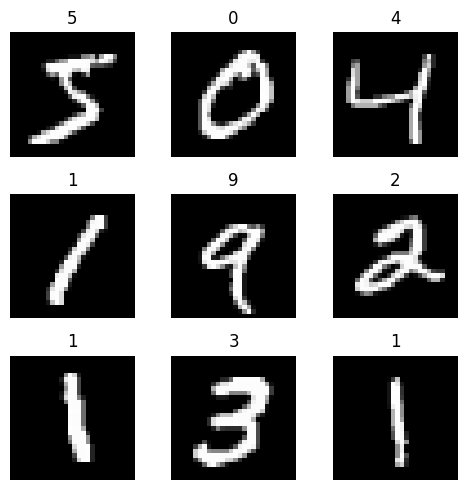

In [6]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(int(y_train[i]))
    plt.axis("off")
plt.tight_layout(); plt.show()

In [7]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42, stratify=y_train)

In [14]:
print("train:", X_train.shape, y_train.shape)
print("val  :", X_val.shape,   y_val.shape)
print("test :", X_test.shape,  y_test.shape)

train: (50000, 784) (50000,)
val  : (10000, 784) (10000,)
test : (10000, 784) (10000,)


In [15]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()] #It computes the proportion of correct predictions (where the predicted class matches the true class) out of the total number of predictions.
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", mode="max", patience=3, restore_best_weights=True
)

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/20
391/391 - 1s - 3ms/step - loss: 0.3649 - sparse_categorical_accuracy: 0.8979 - val_loss: 0.1857 - val_sparse_categorical_accuracy: 0.9463
Epoch 2/20


c:\Users\Arjun\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
  current = self.get_monitor_value(logs)


391/391 - 1s - 2ms/step - loss: 0.1448 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.1331 - val_sparse_categorical_accuracy: 0.9601
Epoch 3/20
391/391 - 1s - 2ms/step - loss: 0.1013 - sparse_categorical_accuracy: 0.9699 - val_loss: 0.1112 - val_sparse_categorical_accuracy: 0.9656
Epoch 4/20
391/391 - 1s - 2ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.1014 - val_sparse_categorical_accuracy: 0.9693
Epoch 5/20
391/391 - 1s - 2ms/step - loss: 0.0600 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0987 - val_sparse_categorical_accuracy: 0.9698
Epoch 6/20
391/391 - 1s - 2ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0959 - val_sparse_categorical_accuracy: 0.9715
Epoch 7/20
391/391 - 1s - 2ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9892 - val_loss: 0.0933 - val_sparse_categorical_accuracy: 0.9736
Epoch 8/20
391/391 - 1s - 2ms/step - loss: 0.0315 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.0936 - val_spar

In [22]:
model.save("F:/corporate majdoor/ML/Hand Digit Recognition/hdr_ANN.keras")

In [3]:
model = tf.keras.models.load_model("hdr_ANN.keras")

In [8]:
probs = model.predict(X_test[:16])
preds = probs.argmax(axis=1)

print("preds:", preds.tolist())
print("true :", y_test[:16].tolist())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
preds: [7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5]
true : [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5]


In [10]:
y_pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
              precision    recall  f1-score   support

           0     0.9643    0.9918    0.9779       980
           1     0.9886    0.9894    0.9890      1135
           2     0.9675    0.9797    0.9735      1032
           3     0.9686    0.9772    0.9729      1010
           4     0.9823    0.9623    0.9722       982
           5     0.9850    0.9596    0.9722       892
           6     0.9633    0.9854    0.9742       958
           7     0.9812    0.9669    0.9740      1028
           8     0.9729    0.9589    0.9659       974
           9     0.9663    0.9653    0.9658      1009

    accuracy                         0.9740     10000
   macro avg     0.9740    0.9737    0.9738     10000
weighted avg     0.9741    0.9740    0.9740     10000

